In [72]:
# Goal: Apply randomForest to Boston data using broader range of parms.
# Packages/options:
rm(list=ls())
library(randomForest)
library(MASS)
library(ggplot2)
# Data
fix(Boston)

In [73]:
# Create train/test subsets:
set.seed(1)
ind <- sample(1:nrow(Boston), round(0.3*nrow(Boston)))
train <- Boston[-ind,]
test  <- Boston[ind,]
print(nrow(train)); print(nrow(test)); print(nrow(train)/nrow(Boston))

[1] 354
[1] 152
[1] 0.6996047


In [77]:
# Define vectors of values for mtry and ntree:
mtry_vec   <- c(3,6,9,12)
ntree_vec  <- c(5,10,50,100,250,500,1000)

# Create matrix to store mse vals:
mse_storage <- matrix(0, nrow=length(mtry_vec), ncol=length(ntree_vec))

# Loop through values of mtry and ntree:
for (i in 1:length(mtry_vec))
{
    for (j in 1:length(ntree_vec))
    {
        # Train randomForest object:
        mod_obj <- randomForest(medv~., data=train, mtry=mtry_vec[i], ntree=ntree_vec[j], importance=TRUE)
        # Generate predictions:
        preds   <- predict(mod_obj, newdata=test)
        # Store MSE:
        mse_storage[i,j] <- mean( (preds-test$medv)^2 )
    }
}

In [78]:
# Stage data for ggplot:
print(mse_storage)
munged <- cbind(as.matrix(ntree_vec), t(mse_storage))
labels <- paste(mtry_vec, "Vars")
colnames(munged) <- c('Num_Trees', labels)
munged_df <- as.data.frame(munged)
print(munged_df)

         [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]
[1,] 23.44422 18.24296 12.87417 14.44368 13.54573 13.60135 13.60469
[2,] 16.53101 10.86928 12.95662 12.02231 11.81363 11.90411 11.47222
[3,] 15.24198 12.92445 10.74936 10.55579 10.99343 11.22542 10.89472
[4,] 14.39934 10.92635 10.09927 11.08495 10.95759 10.77622 10.43020
  Num_Trees   3 Vars   6 Vars   9 Vars  12 Vars
1         5 23.44422 16.53101 15.24198 14.39934
2        10 18.24296 10.86928 12.92445 10.92635
3        50 12.87417 12.95662 10.74936 10.09927
4       100 14.44368 12.02231 10.55579 11.08495
5       250 13.54573 11.81363 10.99343 10.95759
6       500 13.60135 11.90411 11.22542 10.77622
7      1000 13.60469 11.47222 10.89472 10.43020


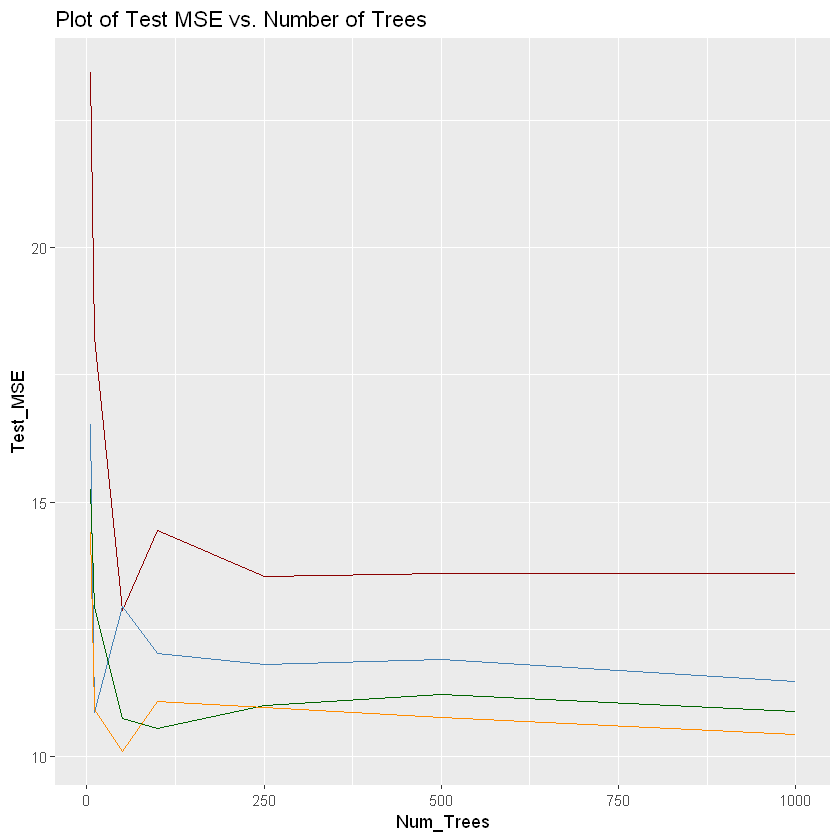

In [79]:
# Plot a la Figure 8.10:
ggplot(munged_df, aes(x=Num_Trees)) + 
  geom_line(aes(y = munged_df$'3 Vars'), color = "darkred") + 
  geom_line(aes(y = munged_df$'6 Vars'), color="steelblue") +
  geom_line(aes(y = munged_df$'9 Vars'), color="darkgreen") +
  geom_line(aes(y = munged_df$'12 Vars'), color="darkorange") +
  labs(title="Plot of Test MSE vs. Number of Trees",
        x ="Num_Trees", y = "Test_MSE")

In [ ]:
# The results show some patterns:
# 1. More variables considered at each split tends to produce lower test MSE
# 2. Up to about 100-250 trees, we see large improvement by using more trees.  Once
#   we get past 100-250 trees, adding more trees results in little/no 
#   further MSE reduction.
# Results takeaways: both considering more vars as well as adding more trees
# show significant performance improvements initially followed by
# diminishing marginal returns.